## Customer Advertising Dataset : Polynomial Regression 

### Hemant Thapa 

#### 1. Libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

#### 2. Loading Dataset

In [3]:
df = pd.read_csv('advertising.csv')

In [4]:
df[:5]

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
df.shape

(200, 4)

In [6]:
df.size

800

In [7]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [8]:
df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

#### 3. Feature Selection 

In [9]:
#feature selection
X = df['TV'].values.reshape(-1, 1)
X[:5]

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8]])

#### 4. Target Selection 

In [10]:
#target
y = df['Sales'].values
y[:5]

array([22.1, 10.4, 12. , 16.5, 17.9])

#### 5. Splitting data into train and test 

In [11]:
# splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 6. Model Selection 

In [12]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [13]:
# predictions for plotting linear regression
X_train_range = np.arange(X_train.min(), 300, 1)[:, np.newaxis] 
y_linear = lr.predict(X_train_range)

In [14]:
pr_quad = LinearRegression()
pr_cubic = LinearRegression()
pr_quartic = LinearRegression()
pr_quintic = LinearRegression()

In [15]:
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
quartic = PolynomialFeatures(degree=4)
quintic = PolynomialFeatures(degree=5)

In [16]:
X_train_quad = quadratic.fit_transform(X_train)
X_train_cubic = cubic.fit_transform(X_train)
X_train_quartic = quartic.fit_transform(X_train)
X_train_quintic = quintic.fit_transform(X_train)

X_test_quad = quadratic.transform(X_test)
X_test_cubic = cubic.transform(X_test)
X_test_quartic = quartic.transform(X_test)
X_test_quintic = quintic.transform(X_test)

pr_quad.fit(X_train_quad, y_train)
pr_cubic.fit(X_train_cubic, y_train)
pr_quartic.fit(X_train_quartic, y_train)
pr_quintic.fit(X_train_quintic, y_train)

y_quad_train = pr_quad.predict(X_train_quad)
y_cubic_train = pr_cubic.predict(X_train_cubic)
y_quartic_train = pr_quartic.predict(X_train_quartic)
y_quintic_train = pr_quintic.predict(X_train_quintic)

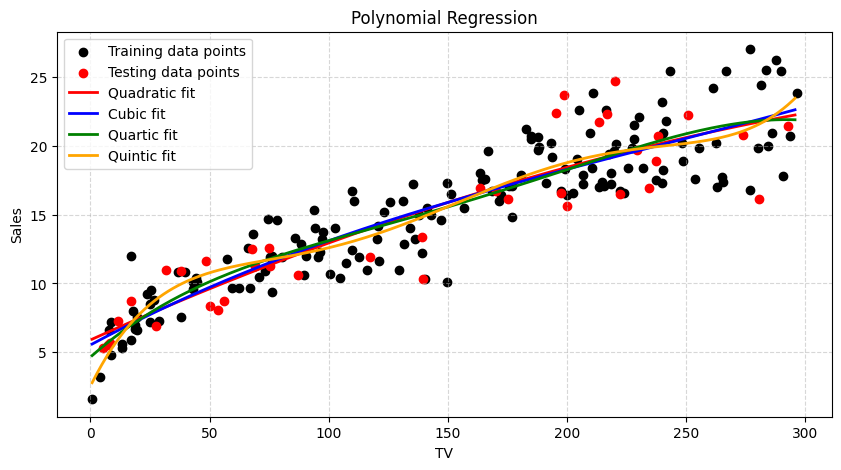

In [17]:
plt.figure(figsize=(10, 5))
plt.scatter(X_train, y_train, label="Training data points", color='black')
plt.scatter(X_test, y_test, label="Testing data points", color='red')

X_train_range = np.arange(X_train.min(), X_train.max(), 1)[:, np.newaxis]
y_quad_range = pr_quad.predict(quadratic.fit_transform(X_train_range))
y_cubic_range = pr_cubic.predict(cubic.fit_transform(X_train_range))
y_quartic_range = pr_quartic.predict(quartic.fit_transform(X_train_range))
y_quintic_range = pr_quintic.predict(quintic.fit_transform(X_train_range))

plt.plot(X_train_range, y_quad_range, label="Quadratic fit", color='red', lw=2)
plt.plot(X_train_range, y_cubic_range, label="Cubic fit", color='blue', lw=2)
plt.plot(X_train_range, y_quartic_range, label="Quartic fit", color='green', lw=2)
plt.plot(X_train_range, y_quintic_range, label="Quintic fit", color='orange', lw=2)

plt.xlabel("TV")
plt.ylabel("Sales")
plt.legend()
plt.title("Polynomial Regression")
plt.grid(True, ls='--', alpha=0.5)
plt.show()

#### 7. Model Evaluation 

In [18]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [19]:
r2_quad = r2_score(y_train, y_quad_train)
mse_quad = mean_squared_error(y_train, y_quad_train)
rmse_quad = np.sqrt(mse_quad)
mae_quad = mean_absolute_error(y_train, y_quad_train)

r2_cubic = r2_score(y_train, y_cubic_train)
mse_cubic = mean_squared_error(y_train, y_cubic_train)
rmse_cubic = np.sqrt(mse_cubic)
mae_cubic = mean_absolute_error(y_train, y_cubic_train)

r2_quartic = r2_score(y_train, y_quartic_train)
mse_quartic = mean_squared_error(y_train, y_quartic_train)
rmse_quartic = np.sqrt(mse_quartic)
mae_quartic = mean_absolute_error(y_train, y_quartic_train)

r2_quintic = r2_score(y_train, y_quintic_train)
mse_quintic = mean_squared_error(y_train, y_quintic_train)
rmse_quintic = np.sqrt(mse_quintic)
mae_quintic = mean_absolute_error(y_train, y_quintic_train)

print("Polynomial Regression Metrics:")
print("Quadratic:")
print(f"R-squared: {r2_quad:.4f}")
print(f"MSE: {mse_quad:.4f}")
print(f"RMSE: {rmse_quad:.4f}")
print(f"MAE: {mae_quad:.4f}")

print("\nCubic:")
print(f"R-squared: {r2_cubic:.4f}")
print(f"MSE: {mse_cubic:.4f}")
print(f"RMSE: {rmse_cubic:.4f}")
print(f"MAE: {mae_cubic:.4f}")

print("\nQuartic:")
print(f"R-squared: {r2_quartic:.4f}")
print(f"MSE: {mse_quartic:.4f}")
print(f"RMSE: {rmse_quartic:.4f}")
print(f"MAE: {mae_quartic:.4f}")

print("\nQuintic:")
print(f"R-squared: {r2_quintic:.4f}")
print(f"MSE: {mse_quintic:.4f}")
print(f"RMSE: {rmse_quintic:.4f}")
print(f"MAE: {mae_quintic:.4f}")

Polynomial Regression Metrics:
Quadratic:
R-squared: 0.8229
MSE: 4.7462
RMSE: 2.1786
MAE: 1.7530

Cubic:
R-squared: 0.8237
MSE: 4.7258
RMSE: 2.1739
MAE: 1.7465

Quartic:
R-squared: 0.8263
MSE: 4.6546
RMSE: 2.1574
MAE: 1.7291

Quintic:
R-squared: 0.8363
MSE: 4.3864
RMSE: 2.0944
MAE: 1.6592


In [20]:
from tabulate import tabulate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, r2_score

In [21]:
model_names = ["Quadratic", "Cubic", "Quartic", "Quintic"]
models = [pr_quad, pr_cubic, pr_quartic, pr_quintic]

results = []

for name, model in zip(model_names, models):
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    results.append([name] + list(cv_scores))

headers = ["Model", "CV 1", "CV 2", "CV 3", "CV 4", "CV 5"]
print(tabulate(results, headers=headers))

Model          CV 1      CV 2      CV 3      CV 4      CV 5
---------  --------  --------  --------  --------  --------
Quadratic  0.801615  0.768505  0.814029  0.793816  0.773424
Cubic      0.801615  0.768505  0.814029  0.793816  0.773424
Quartic    0.801615  0.768505  0.814029  0.793816  0.773424
Quintic    0.801615  0.768505  0.814029  0.793816  0.773424


#### 8. Residual Analaysis 

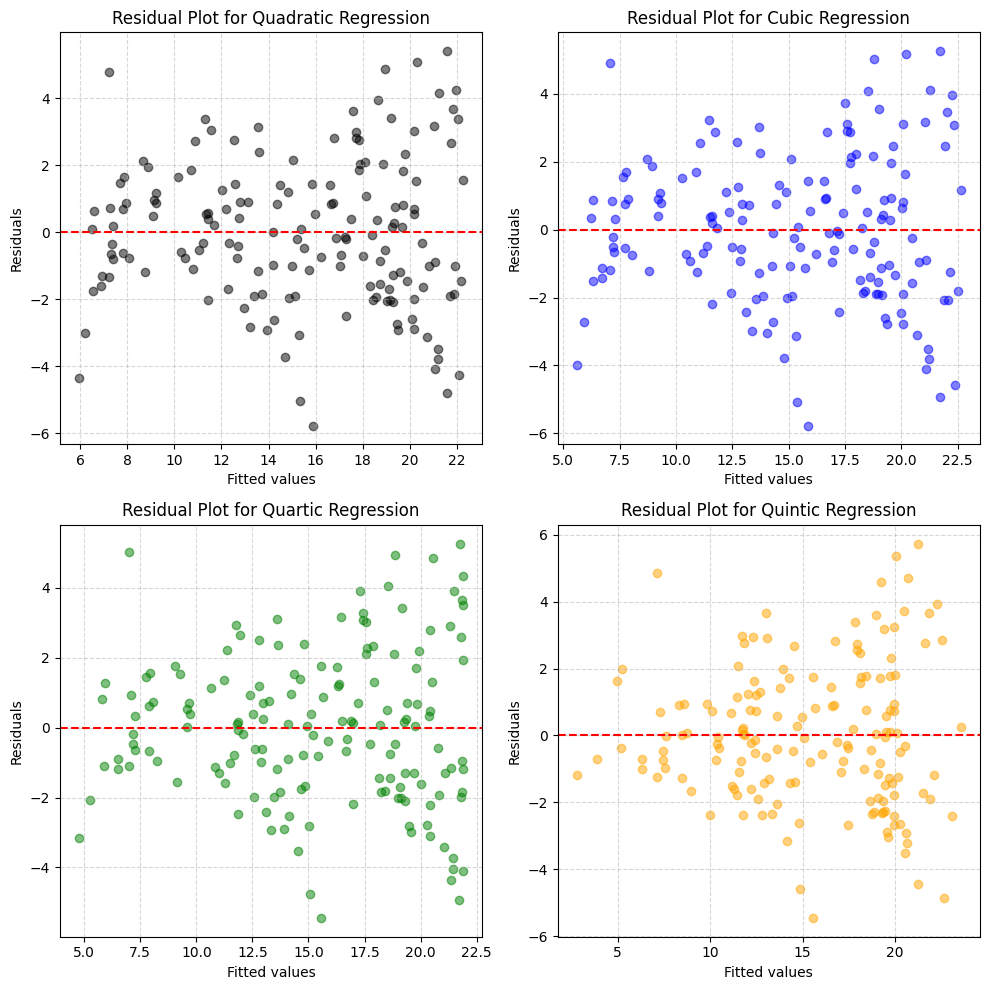

In [22]:
residuals_linear = y_train - lr.predict(X_train)
residuals_quad = y_train - y_quad_train
residuals_cubic = y_train - y_cubic_train
residuals_quartic = y_train - pr_quartic.predict(X_train_quartic)
residuals_quintic = y_train - pr_quintic.predict(X_train_quintic)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 10))
ax1.scatter(y_quad_train, residuals_quad, color='black', alpha=0.5)
ax1.set_xlabel('Fitted values')
ax1.set_ylabel('Residuals')
ax1.set_title('Residual Plot for Quadratic Regression')
ax1.axhline(y=0, color='red', linestyle='--')
ax1.grid(True, ls='--', alpha=0.5)

ax2.scatter(y_cubic_train, residuals_cubic, color='blue', alpha=0.5)
ax2.set_xlabel('Fitted values')
ax2.set_ylabel('Residuals')
ax2.set_title('Residual Plot for Cubic Regression')
ax2.axhline(y=0, color='red', linestyle='--')
ax2.grid(True, ls='--', alpha=0.5)

ax3.scatter(pr_quartic.predict(X_train_quartic), residuals_quartic, color='green', alpha=0.5)
ax3.set_xlabel('Fitted values')
ax3.set_ylabel('Residuals')
ax3.set_title('Residual Plot for Quartic Regression')
ax3.axhline(y=0, color='red', linestyle='--')
ax3.grid(True, ls='--', alpha=0.5)

ax4.scatter(pr_quintic.predict(X_train_quintic), residuals_quintic, color='orange', alpha=0.5)
ax4.set_xlabel('Fitted values')
ax4.set_ylabel('Residuals')
ax4.set_title('Residual Plot for Quintic Regression')
ax4.axhline(y=0, color='red', linestyle='--')
ax4.grid(True, ls='--', alpha=0.5)
plt.tight_layout()
plt.show()

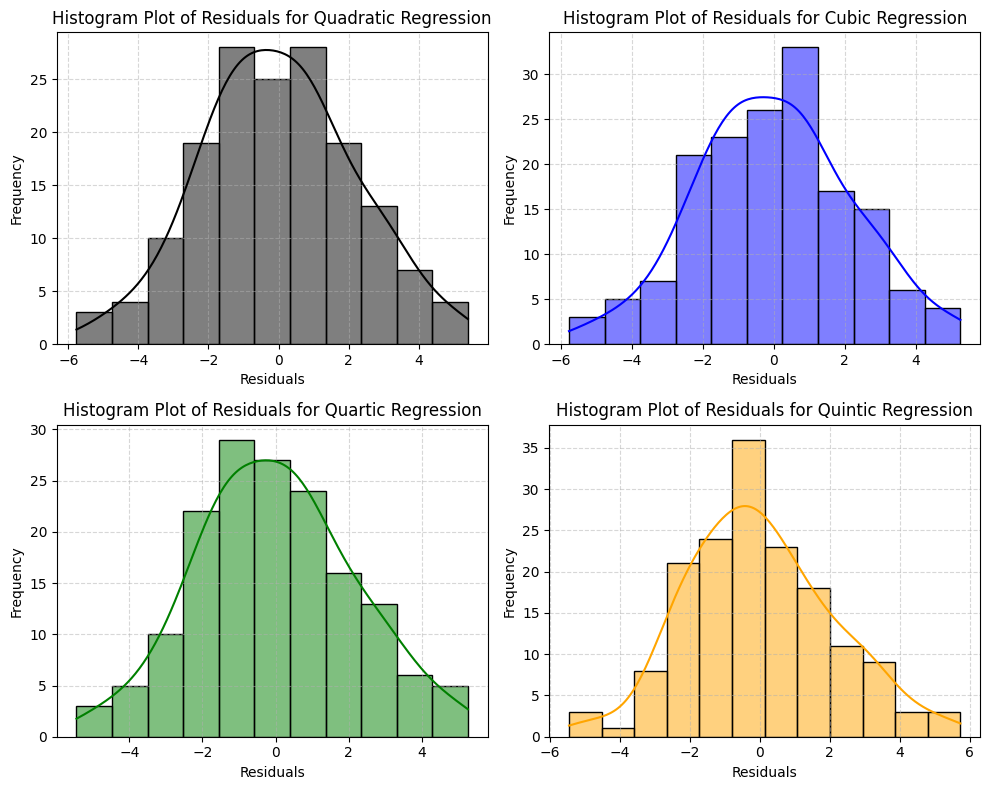

In [23]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 8))
sns.histplot(residuals_quad, kde=True, color='black', alpha=0.5, ax=ax1)
ax1.set_title('Histogram Plot of Residuals for Quadratic Regression')
ax1.set_xlabel('Residuals')
ax1.set_ylabel('Frequency')
ax1.grid(True, ls='--', alpha=0.5)

sns.histplot(residuals_cubic, kde=True, color='blue', alpha=0.5, ax=ax2)
ax2.set_title('Histogram Plot of Residuals for Cubic Regression')
ax2.set_xlabel('Residuals')
ax2.set_ylabel('Frequency')
ax2.grid(True, ls='--', alpha=0.5)

sns.histplot(residuals_quartic, kde=True, color='green', alpha=0.5, ax=ax3)
ax3.set_title('Histogram Plot of Residuals for Quartic Regression')
ax3.set_xlabel('Residuals')
ax3.set_ylabel('Frequency')
ax3.grid(True, ls='--', alpha=0.5)

sns.histplot(residuals_quintic, kde=True, color='orange', alpha=0.5, ax=ax4)
ax4.set_title('Histogram Plot of Residuals for Quintic Regression')
ax4.set_xlabel('Residuals')
ax4.set_ylabel('Frequency')
ax4.grid(True, ls='--', alpha=0.5)

plt.tight_layout()
plt.show()

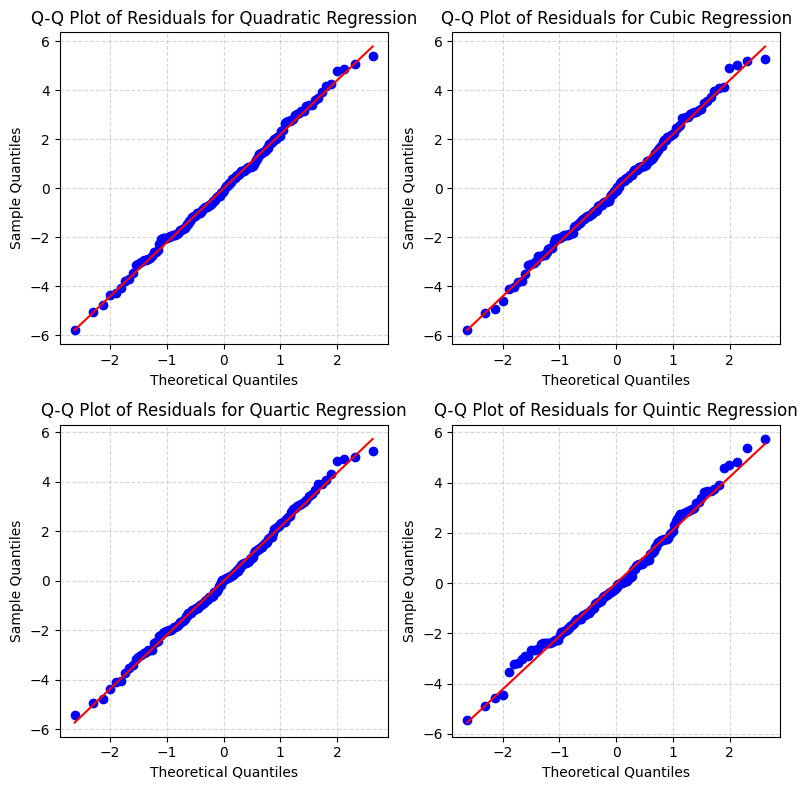

In [24]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8, 8))
stats.probplot(residuals_quad, dist="norm", plot=ax1)
ax1.set_title('Q-Q Plot of Residuals for Quadratic Regression')
ax1.set_xlabel('Theoretical Quantiles')
ax1.set_ylabel('Sample Quantiles')
ax1.grid(True, ls='--', alpha=0.5)

stats.probplot(residuals_cubic, dist="norm", plot=ax2)
ax2.set_title('Q-Q Plot of Residuals for Cubic Regression')
ax2.set_xlabel('Theoretical Quantiles')
ax2.set_ylabel('Sample Quantiles')
ax2.grid(True, ls='--', alpha=0.5)

stats.probplot(residuals_quartic, dist="norm", plot=ax3)
ax3.set_title('Q-Q Plot of Residuals for Quartic Regression')
ax3.set_xlabel('Theoretical Quantiles')
ax3.set_ylabel('Sample Quantiles')
ax3.grid(True, ls='--', alpha=0.5)

stats.probplot(residuals_quintic, dist="norm", plot=ax4)
ax4.set_title('Q-Q Plot of Residuals for Quintic Regression')
ax4.set_xlabel('Theoretical Quantiles')
ax4.set_ylabel('Sample Quantiles')
ax4.grid(True, ls='--', alpha=0.5)
plt.tight_layout()
plt.show()

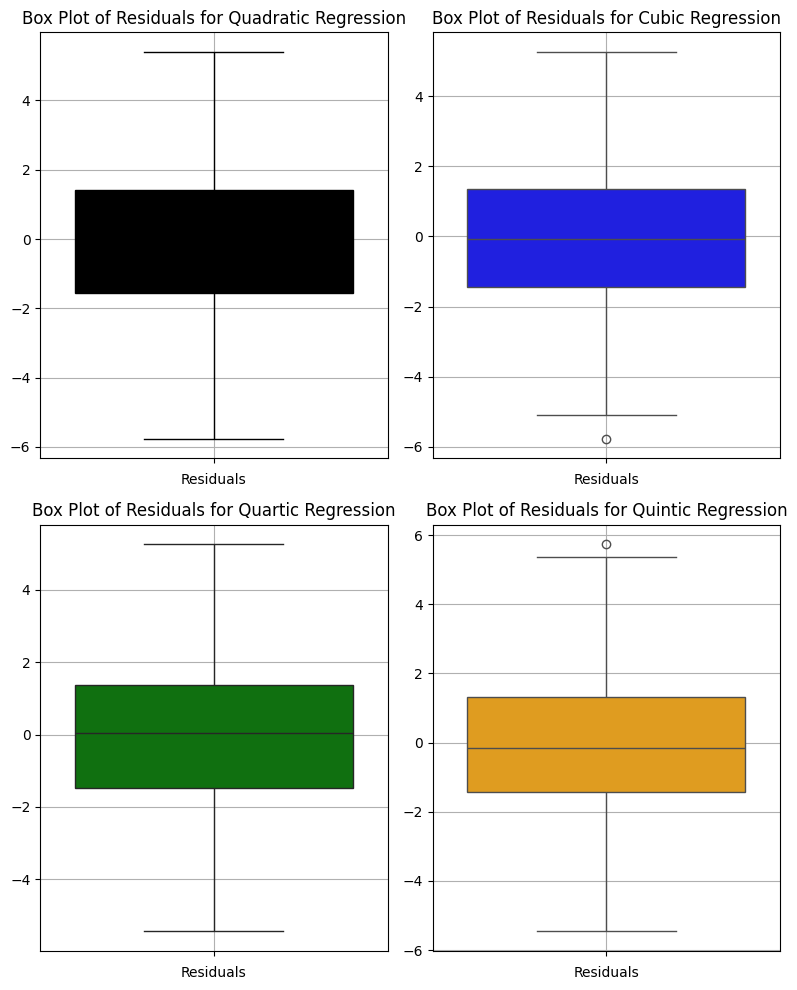

In [25]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8, 10))
sns.boxplot(y=residuals_quad, color='black', ax=ax1)
ax1.set_title('Box Plot of Residuals for Quadratic Regression')
ax1.set_xlabel('Residuals')
ax1.grid(True)

sns.boxplot(y=residuals_cubic, color='blue', ax=ax2)
ax2.set_title('Box Plot of Residuals for Cubic Regression')
ax2.set_xlabel('Residuals')
ax2.grid(True)

sns.boxplot(y=residuals_quartic, color='green', ax=ax3)
ax3.set_title('Box Plot of Residuals for Quartic Regression')
ax3.set_xlabel('Residuals')
ax3.grid(True)

sns.boxplot(y=residuals_quintic, color='orange', ax=ax4)
ax4.set_title('Box Plot of Residuals for Quintic Regression')
ax4.set_xlabel('Residuals')
ax4.grid(True)
plt.tight_layout()
plt.show()

### References: 

polynomial models https://www.slideserve.com/ifama/polynomial-models

polynomial features in Scikit-learn https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html
